In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import missingno as msno

%matplotlib inline
warnings.filterwarnings("ignore")

## **Reading Data and Selecting The Variables**


In [25]:
working_directory = "\\".join(os.getcwd().split("\\")[:-1])
DATASETS = os.path.join(working_directory, "data")
RAW_PATH = os.path.join(DATASETS, "raw")
parquet_name = os.path.join(RAW_PATH, "bfrss2019.parquet")

In [26]:
df = pd.read_parquet(parquet_name)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418268 entries, 0 to 418267
Columns: 342 entries, _STATE to _AIDTST4
dtypes: float64(326), object(16)
memory usage: 1.1+ GB


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,01182019,01,18,2019,1100.0,2019000001,2.019000e+09,1.0,...,114.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0
1,1.0,1.0,01132019,01,13,2019,1100.0,2019000002,2.019000e+09,1.0,...,121.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
2,1.0,1.0,01182019,01,18,2019,1100.0,2019000003,2.019000e+09,1.0,...,164.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0
3,1.0,1.0,01182019,01,18,2019,1200.0,2019000004,2.019000e+09,1.0,...,NaN,9.0,9.0,1.0,1.0,1.0,1.0,9.0,9.0,NaN
4,1.0,1.0,01042019,01,04,2019,1100.0,2019000005,2.019000e+09,1.0,...,178.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0


In [27]:
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_VEGESU1', '_FRTLT1A', '_VEGLT1A', '_FRT16A', '_VEG23A', '_FRUITE1',
       '_VEGETE1', '_FLSHOT7', '_PNEUMO3', '_AIDTST4'],
      dtype='object', length=342)

In [28]:
columns = ["GENHLTH",       # categorical
           "PHYSHLTH",      # numerical
           "CELLSEX",      # categorical
           "MENTHLTH",      # numerical
           "MEDCOST",      # categorical
           "CHECKUP1",      # categorical
            "EXERANY2",
            "CVDINFR4",
            "CVDCRHD4",
            "CVDSTRK3",
            "ADDEPEV3",
            "CHCKDNY2",
            "HAVARTH4",
            "DIABETE4",
            "MARITAL",
            "EDUCA",
            "RENTHOM1",
            "EMPLOY1",
            "PREGNANT",
            "DIFFWALK",
            "DIFFDRES",
            "HADSIGM3",
            "SMOKDAY2",
            "CSRVTRT3",
            "CIMEMLOS",
            "ACEDIVRC",
            "ACETOUCH",
    
            "STOPSMK2",
            "ASBIRDUC",
            "SOMALE",
            "MSCODE",
            "_MENT14D",
            "_AGE_G",
            "_CHLDCNT",
            "_EDUCAG",
            "SEXVAR",
            "_IMPRACE",
            "_RFBMI5",
            "_TOTINDA",
            "_SMOKER3",
            "DRNKANY5",
            "_AGE65YR"]

# _AGE_G  YAŞ kolonu olarak kullanılacak

In [29]:
df = df[columns]

**Looking for Missing Values and Handling Them**


Since missing values are very few compared to the size of the data, there is no problem in deleting them.


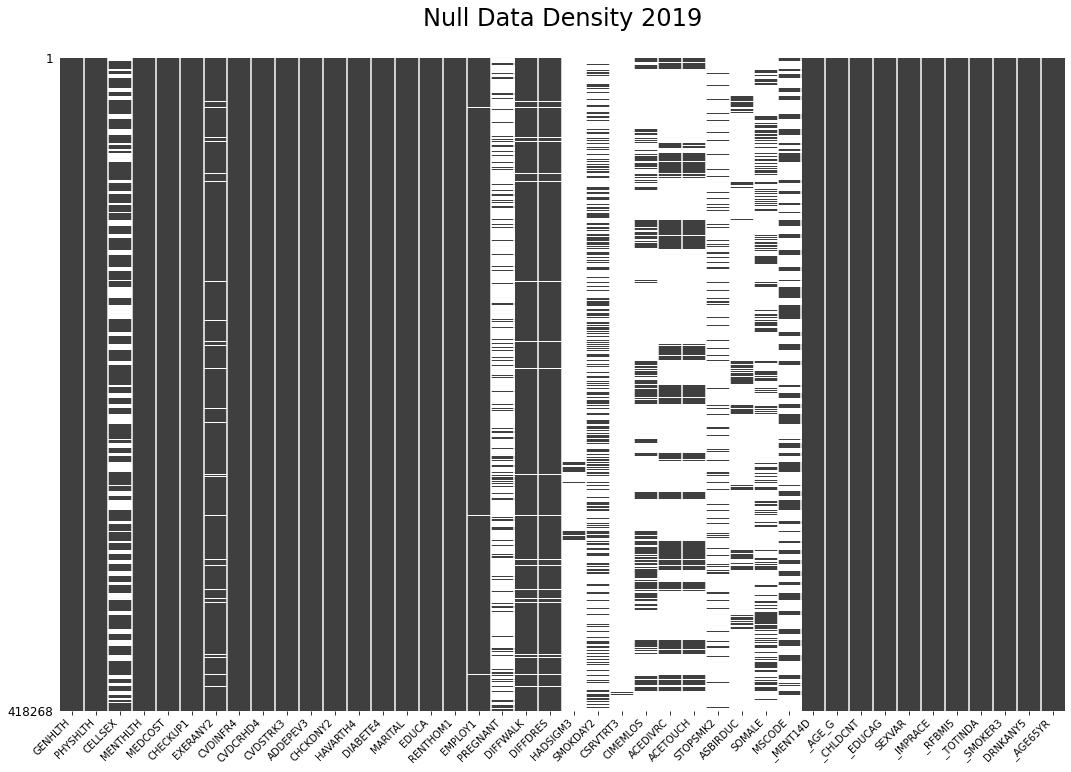

In [30]:
# Visualize null data density
msno.matrix(df, figsize=(18,12), sparkline=False, fontsize=10)

# Set the title
plt.title('Null Data Density 2019', fontsize=24, y=1.04)

# Move the x-axis tick labels below the graph by adjusting the layout
ax = plt.gca()
ax.xaxis.tick_bottom()

# Set custom tick positions and labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=45, ha='right')

# Save the figure
plt.savefig(r"..\graphs\EDA\2019\null-data-density-2019.png", facecolor="white", bbox_inches = "tight",pad_inches=0.3)

# Show the plot
plt.show()

In [31]:
# Set the threshold for null values
threshold = 0.05  # Adjust as needed

# Calculate the number of non-null values required for a column to be retained
min_non_nulls = int((1 - threshold) * len(df))

# Drop columns based on the threshold
df = df.dropna(axis=1, thresh=min_non_nulls)

In [32]:
# Set the threshold for null values
threshold = 0.05 # Adjust as needed


# Calculate the number of non-null values required for a row to be retained
min_non_nulls = int((1 - threshold) * len(df.columns))

# Drop rows based on the threshold
df = df.dropna(axis=0, thresh=min_non_nulls)

In [33]:
df

,GENHLTH,PHYSHLTH,MENTHLTH,MEDCOST,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,ADDEPEV3,...,_AGE_G,_CHLDCNT,_EDUCAG,SEXVAR,_IMPRACE,_RFBMI5,_TOTINDA,_SMOKER3,DRNKANY5,_AGE65YR
0,3.0,15.0,88.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,6.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0
1,4.0,10.0,88.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,6.0,1.0,3.0,2.0,1.0,1.0,1.0,4.0,2.0,2.0
2,3.0,88.0,30.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,6.0,1.0,4.0,2.0,2.0,2.0,1.0,4.0,2.0,2.0
4,2.0,88.0,88.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,6.0,1.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0
6,2.0,30.0,88.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,6.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418263,3.0,88.0,88.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,6.0,1.0,2.0,1.0,5.0,2.0,2.0,4.0,2.0,2.0
418264,2.0,88.0,88.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,4.0,1.0,1.0,2.0,5.0,2.0,1.0,4.0,1.0,1.0
418265,2.0,88.0,5.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,2.0,5.0,2.0,1.0,4.0,2.0,1.0
418266,3.0,88.0,88.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,6.0,1.0,2.0,2.0,5.0,1.0,1.0,4.0,2.0,2.0


In [34]:
df.dropna(inplace=True)

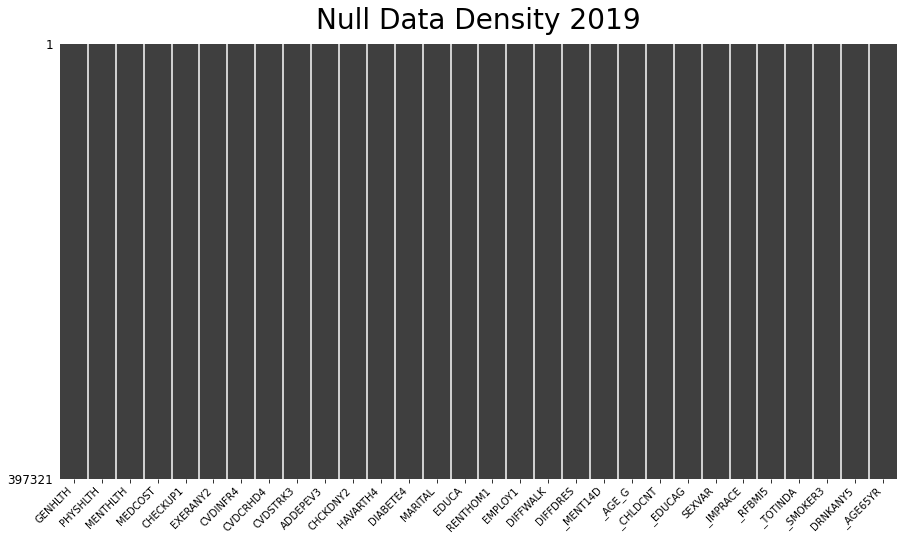

In [35]:
# Visualize null data density
msno.matrix(df, figsize=(15, 8), sparkline=False, fontsize=10)

# Set the title
plt.title('Null Data Density 2019', fontsize=28, y=1.02)

# Move the x-axis tick labels below the graph by adjusting the layout
ax = plt.gca()
ax.xaxis.tick_bottom()

# Set custom tick positions and labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=45, ha='right')

# Show the plot
plt.show()

In [36]:
df

,GENHLTH,PHYSHLTH,MENTHLTH,MEDCOST,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,ADDEPEV3,...,_AGE_G,_CHLDCNT,_EDUCAG,SEXVAR,_IMPRACE,_RFBMI5,_TOTINDA,_SMOKER3,DRNKANY5,_AGE65YR
0,3.0,15.0,88.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,6.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0
1,4.0,10.0,88.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,6.0,1.0,3.0,2.0,1.0,1.0,1.0,4.0,2.0,2.0
2,3.0,88.0,30.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,6.0,1.0,4.0,2.0,2.0,2.0,1.0,4.0,2.0,2.0
4,2.0,88.0,88.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,6.0,1.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0
6,2.0,30.0,88.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,6.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418263,3.0,88.0,88.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,6.0,1.0,2.0,1.0,5.0,2.0,2.0,4.0,2.0,2.0
418264,2.0,88.0,88.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,4.0,1.0,1.0,2.0,5.0,2.0,1.0,4.0,1.0,1.0
418265,2.0,88.0,5.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,2.0,5.0,2.0,1.0,4.0,2.0,1.0
418266,3.0,88.0,88.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,6.0,1.0,2.0,2.0,5.0,1.0,1.0,4.0,2.0,2.0


In [37]:
df.isnull().sum().sum()

0

In [38]:
df.columns

Index(['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'MEDCOST', 'CHECKUP1', 'EXERANY2',
       'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4',
       'DIABETE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'EMPLOY1', 'DIFFWALK',
       'DIFFDRES', '_MENT14D', '_AGE_G', '_CHLDCNT', '_EDUCAG', 'SEXVAR',
       '_IMPRACE', '_RFBMI5', '_TOTINDA', '_SMOKER3', 'DRNKANY5', '_AGE65YR'],
      dtype='object')

In [43]:
# Define a dictionary with column names and their desired data types
dtype_mapping = {
    'GENHLTH': 'object',
    'PHYSHLTH': 'float64',
    'MENTHLTH': 'float64',
    'CHECKUP1': 'object',
    'EXERANY2': 'object',
    'CVDINFR4': 'object',
    'CVDCRHD4': 'object',
    'CVDSTRK3': 'object',
    'ADDEPEV3': 'object',
    'CHCKDNY2': 'object',
    'HAVARTH4': 'object',
    'DIABETE4': 'object',
    'MARITAL': 'object',
    'EDUCA': 'object',
    'RENTHOM1': 'object',
    'EMPLOY1': 'object',
    'DIFFWALK': 'object',
    '_MENT14D': 'object',
    '_AGE_G': 'object',
    '_CHLDCNT': 'object',
    '_EDUCAG': 'object',
    'SEXVAR': 'object',
    '_IMPRACE': 'object',
    '_RFBMI5': 'object',
    '_TOTINDA': 'object',
    '_SMOKER3': 'object',
}

# Convert the data types of the specified columns
df = df.astype(dtype_mapping)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397321 entries, 0 to 418267
Data columns (total 30 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   397321 non-null  object 
 1   PHYSHLTH  397321 non-null  float64
 2   MENTHLTH  397321 non-null  float64
 3   MEDCOST   397321 non-null  float64
 4   CHECKUP1  397321 non-null  object 
 5   EXERANY2  397321 non-null  object 
 6   CVDINFR4  397321 non-null  object 
 7   CVDCRHD4  397321 non-null  object 
 8   CVDSTRK3  397321 non-null  object 
 9   ADDEPEV3  397321 non-null  object 
 10  CHCKDNY2  397321 non-null  object 
 11  HAVARTH4  397321 non-null  object 
 12  DIABETE4  397321 non-null  object 
 13  MARITAL   397321 non-null  object 
 14  EDUCA     397321 non-null  object 
 15  RENTHOM1  397321 non-null  object 
 16  EMPLOY1   397321 non-null  object 
 17  DIFFWALK  397321 non-null  object 
 18  DIFFDRES  397321 non-null  float64
 19  _MENT14D  397321 non-null  object 
 20  _AGE_G   

In [45]:
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Specify the target column
target_column = 'CVDCRHD4'

# Identify object-type columns excluding the target column
object_columns = df.select_dtypes(include=['object']).columns
object_columns = object_columns[object_columns != target_column]

# Create an empty dictionary to store the results
chi2_results = {
    'Variable': [],
    '2019-Chi2_Statistic': [],
    '2019-P_Value': [],
    '2019-Degrees_of_Freedom': [],
}

# Perform chi-square test for each object-type column
for column in object_columns:
    contingency_table = pd.crosstab(df[target_column], df[column])
    
    # Perform the chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results in the dictionary
    chi2_results['Variable'].append(column)
    chi2_results['2019-Chi2_Statistic'].append(chi2_stat)
    chi2_results['2019-P_Value'].append(p_value)
    chi2_results['2019-Degrees_of_Freedom'].append(dof)

# Convert the dictionary to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# Display the DataFrame
chi2_results_df


,Variable,2019-Chi2_Statistic,2019-P_Value,2019-Degrees_of_Freedom
0,GENHLTH,23550.299730,0.000000e+00,18
1,CHECKUP1,9282.153220,0.000000e+00,18
2,EXERANY2,9733.958533,0.000000e+00,9
3,CVDINFR4,292283.696444,0.000000e+00,9
4,CVDSTRK3,210812.511850,0.000000e+00,9
5,ADDEPEV3,65263.576897,0.000000e+00,9
6,CHCKDNY2,161505.008711,0.000000e+00,9
7,HAVARTH4,128057.533748,0.000000e+00,9
8,DIABETE4,135250.142343,0.000000e+00,15
9,MARITAL,7224.513585,0.000000e+00,18


In [46]:
output_path = r"..\outputs\\2019\\"
chi2_results_df.to_csv(output_path + "chi2_results.csv")


In [47]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

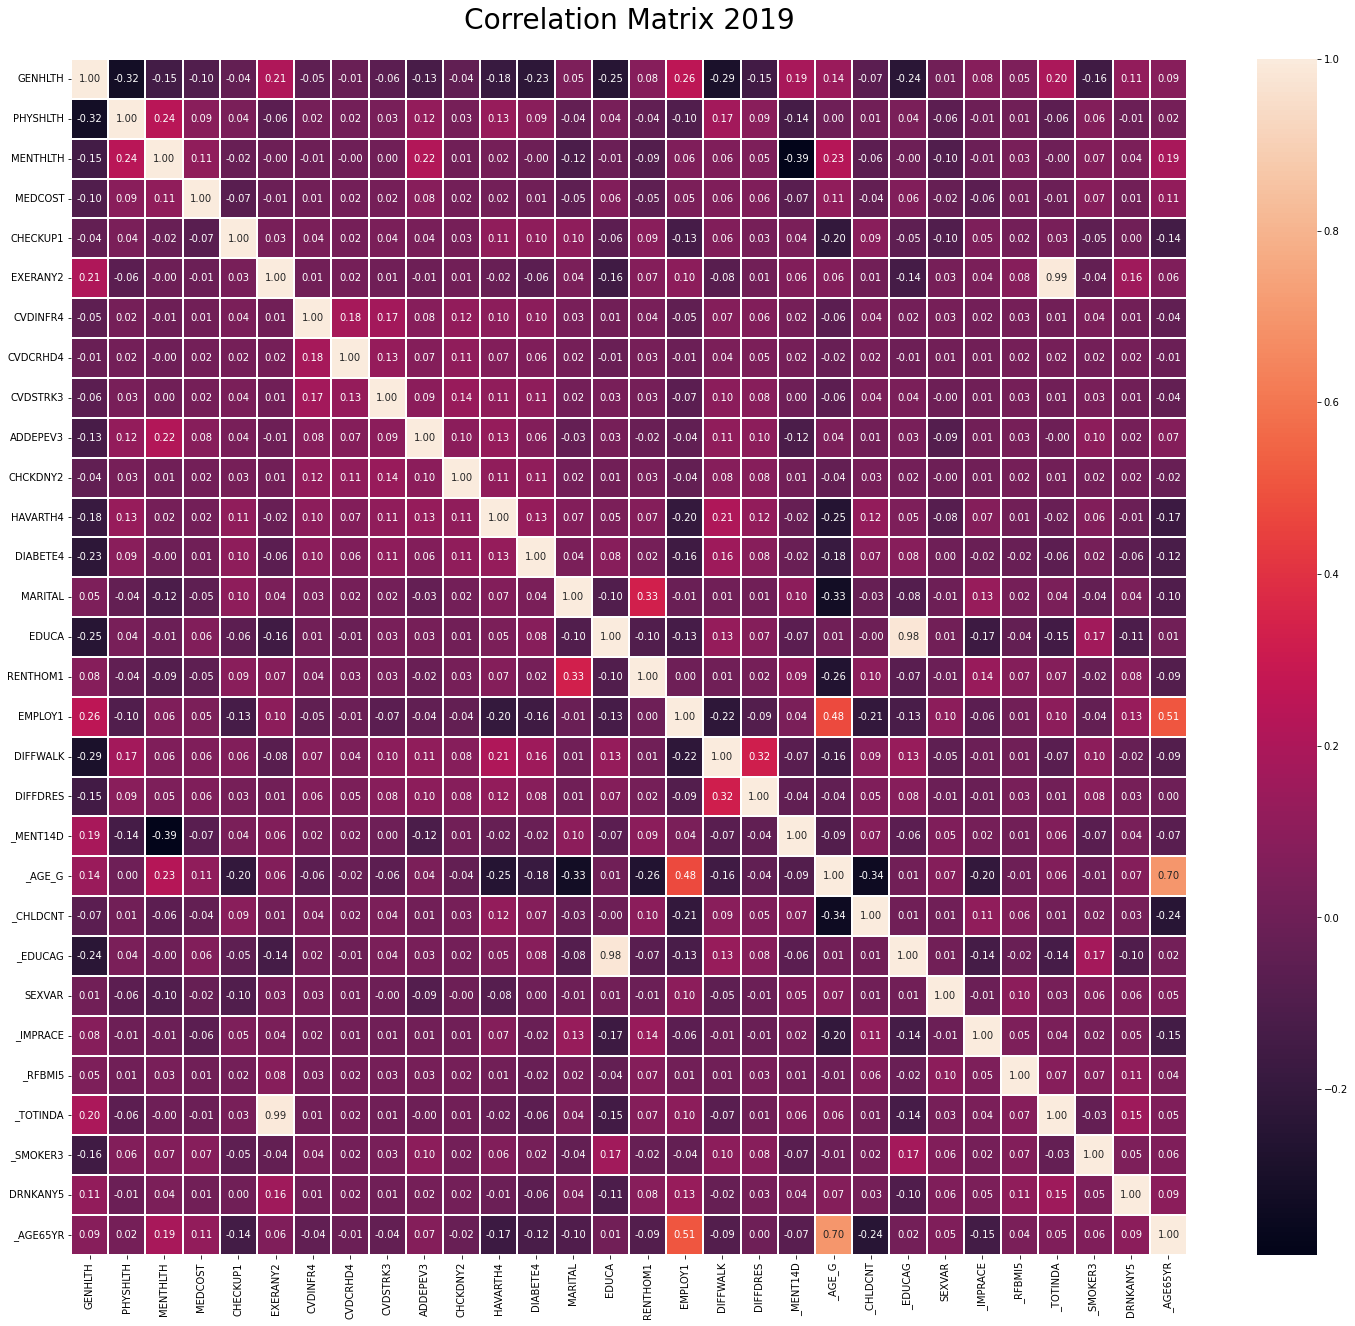

In [49]:

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(25, 22))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.3)
plt.title('Correlation Matrix 2019', fontsize = 28 , y=1.02)
plt.savefig(r"..\graphs\EDA\2019\\" + "corr-heatmap-2019.png", facecolor = "white", bbox_inches = "tight", pad_inches = 0.5)
plt.show()

In [50]:
import pandas as pd

# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Specify the target column
target_column = 'CVDCRHD4'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with respect to the target column (excluding the target column itself)
correlation_with_target = correlation_matrix[target_column].drop(target_column).sort_values(ascending=False)

# Create a DataFrame to store the results
correlation_results_df = pd.DataFrame({
    'Feature': correlation_with_target.index,
    '2019-Correlation_with_Target': correlation_with_target.values
})

# Display the correlation table
correlation_results_df



,Feature,2019-Correlation_with_Target
0,CVDINFR4,0.180803
1,CVDSTRK3,0.127452
2,CHCKDNY2,0.108951
3,ADDEPEV3,0.071148
4,HAVARTH4,0.067867
5,DIABETE4,0.056793
6,DIFFDRES,0.046598
7,DIFFWALK,0.043418
8,RENTHOM1,0.030525
9,CHECKUP1,0.024983


In [51]:
output_path = r"..\outputs\2019\\"
correlation_results_df.to_csv(output_path + "correlation_results.csv")



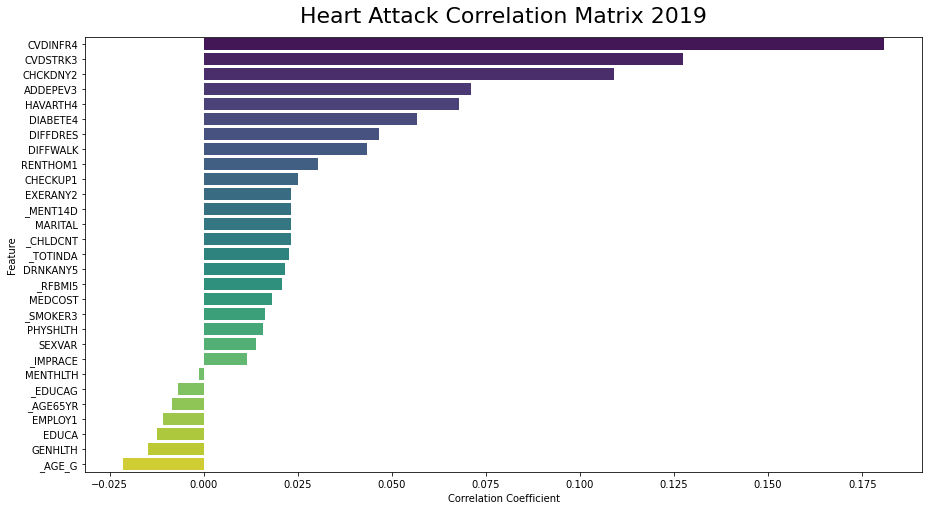

In [52]:
# Plot the correlations
plt.figure(figsize=(15, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="viridis")
plt.title('Heart Attack Correlation Matrix 2019', fontsize = 22 , y=1.02)
plt.savefig(r"..\graphs\EDA\2019\\" + "heart-attack-corr-matrix-2019.png", facecolor = "white", bbox_inches = "tight", pad_inches = 0.3)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()